# Test for stationary using ADF test

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

The Augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative 
number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

In [ ]:
import pandas as pd 
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC') #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value #Critical values for the ADF test for 1, 5, and 10% significance levels with the constant model are −3.43, −2.87, and −2.57, respectively.
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
        

**ADF test is conducted with the following assumptions:**

Null Hypothesis (HO): Series is non-stationary or series has a unit root.
Alternate Hypothesis(HA): Series is stationary or series has no unit root.

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

**Conditions to Reject Null Hypothesis(HO):**

If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO) i.e., time series does not have a unit root, meaning it is stationary, else otherwise.

**Electric Production Dataset**

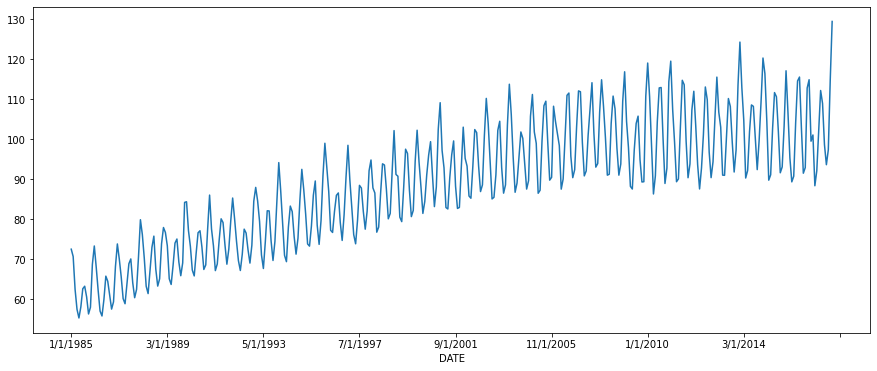

In [ ]:
series = pd.read_csv(r'/content/Electric_Production.csv', header=0, index_col=0)
series['IPG2211A2N'].plot(figsize=(15,6))
pyplot.show()

In [ ]:
Augmented_Dickey_Fuller_Test_func(series['IPG2211A2N'], 'value')

Results of Dickey-Fuller Test for column: value
Test Statistic                  -2.256990
p-value                          0.186215
No Lags Used                    15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Test Statistic is -2.256990 is less than any critical values.
p-value is  0.186215

The p-value is obtained is greater than significance level of 0.05.

So Fail to reject the null hypothesis and 
Data is non-stationary

In [ ]:
Augmented_Dickey_Fuller_Test_func(series['IPG2211A2N'].diff().dropna(),'value')

Results of Dickey-Fuller Test for column: value
Test Statistic                -7.104891e+00
p-value                        4.077787e-10
No Lags Used                   1.400000e+01
Number of Observations Used    3.810000e+02
Critical Value (1%)           -3.447631e+00
Critical Value (5%)           -2.869156e+00
Critical Value (10%)          -2.570827e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Test Statistic is -7.104891 is less than any critical values.


The p-value 4.077787e-10 is obtained is less than significance level of 0.05.

So Reject the null hypothesis and Data is stationary

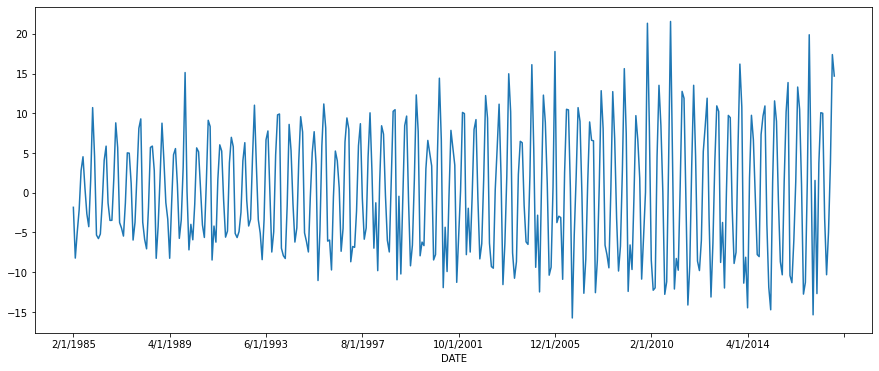

In [ ]:
series['IPG2211A2N'].diff().dropna().plot(figsize=(15,6))
pyplot.show()